In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from google.colab import drive
import os
import pandas as pd
import csv
import os
from glob import glob
import scipy.io.wavfile
import matplotlib.pyplot as plt
import pywt
import shutil
from pywt import wavedec

In [ ]:
drive.mount('/content/drive')
path_base = "/content/drive/MyDrive/Data Tugas Akhir"
Preprocess_mi = f'{path_base}{os.sep}Preprocess_MI/'
Extracted_wavelet = f'{path_base}{os.sep}Wavelet_Extracted_MI/'
audio_files_mi = glob(Preprocess_mi  + '*.wav')

Mounted at /content/drive


In [ ]:
def wavelet_extraction(data, coeff, dwt, db, level):
    N = np.array(data).size
    a, ds = dwt[0], list(reversed(dwt[1:]))

    if coeff =='a':
        return pywt.upcoef('a', a, db, level=level)[:N]
    elif coeff == 'd':
        return pywt.upcoef('d', ds[level-1], db, level=level)[:N]
    else:
        raise ValueError("Invalid coefficients: {}".format(coeff))

In [ ]:
features_wavelet = []
wavelet_file = []
count = 1
db = 'db6'
level = 4
directory = Preprocess_mi
for audio in os.listdir(directory):
    audio_path = directory+audio
    data_wave, sr = librosa.load(audio_path, res_type='kaiser_best')
    coeffs = pywt.wavedec(data_wave, db, level=level)
    A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
    D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
    D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
    D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
    D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
    wavelets = A4 + D4 + D3 + D2 + D1
    file_name = "Extracted_wavelet_MI_%s.csv" % count
    pd.DataFrame(wavelets).to_csv(file_name)
    wavelet_file.append(file_name)
    features_wavelet.append(wavelets)
    count = count+1

In [ ]:
wavelet_file

['Extracted_wavelet_MI_1.csv',
 'Extracted_wavelet_MI_2.csv',
 'Extracted_wavelet_MI_3.csv',
 'Extracted_wavelet_MI_4.csv',
 'Extracted_wavelet_MI_5.csv',
 'Extracted_wavelet_MI_6.csv',
 'Extracted_wavelet_MI_7.csv',
 'Extracted_wavelet_MI_8.csv',
 'Extracted_wavelet_MI_9.csv',
 'Extracted_wavelet_MI_10.csv',
 'Extracted_wavelet_MI_11.csv',
 'Extracted_wavelet_MI_12.csv',
 'Extracted_wavelet_MI_13.csv',
 'Extracted_wavelet_MI_14.csv',
 'Extracted_wavelet_MI_15.csv',
 'Extracted_wavelet_MI_16.csv',
 'Extracted_wavelet_MI_17.csv',
 'Extracted_wavelet_MI_18.csv',
 'Extracted_wavelet_MI_19.csv',
 'Extracted_wavelet_MI_20.csv',
 'Extracted_wavelet_MI_21.csv',
 'Extracted_wavelet_MI_22.csv',
 'Extracted_wavelet_MI_23.csv',
 'Extracted_wavelet_MI_24.csv',
 'Extracted_wavelet_MI_25.csv',
 'Extracted_wavelet_MI_26.csv',
 'Extracted_wavelet_MI_27.csv',
 'Extracted_wavelet_MI_28.csv',
 'Extracted_wavelet_MI_29.csv',
 'Extracted_wavelet_MI_30.csv',
 'Extracted_wavelet_MI_31.csv',
 'Extracted_wavel

In [ ]:
base_directory = "/content"
for f in wavelet_file:
    src_path = os.path.join(base_directory, f)
    dst_path = os.path.join(Extracted_wavelet, f)
    shutil.move(src_path, dst_path)

In [ ]:
features_wavelet

[array([ 4.3219067e-08,  1.9165360e-07,  4.9143830e-07, ...,
        -1.1987753e-04, -1.2690299e-04, -1.4846261e-04], dtype=float32),
 array([-4.2653741e-24, -1.8914668e-23, -4.9116481e-23, ...,
         2.0269385e-23,  7.4678598e-24, -6.6134517e-24], dtype=float32),
 array([ 6.9085391e-09,  3.0635697e-08,  1.5213624e-07, ...,
        -5.2729347e-06, -5.3600456e-06, -1.7319652e-06], dtype=float32),
 array([2.7205981e-11, 1.2064406e-10, 5.5829269e-10, ..., 6.1438295e-06,
        1.8889215e-06, 1.0518746e-06], dtype=float32),
 array([4.5479744e-08, 2.0167849e-07, 3.1131876e-07, ..., 7.0859933e-05,
        6.8266585e-05, 6.5441112e-05], dtype=float32),
 array([2.6712488e-07, 1.1845568e-06, 2.1972332e-06, ..., 2.3581435e-08,
        3.9672571e-08, 1.5564736e-07], dtype=float32),
 array([-1.9331173e-07, -8.5723485e-07, -2.4692308e-06, ...,
        -3.0273981e-08, -1.0640300e-08,  1.0019795e-09], dtype=float32),
 array([-8.0825338e-09, -3.5841744e-08, -7.9905867e-08, ...,
        -2.7658332e

Menghitung Mean

In [ ]:
wavelet_means = []
for i in features_wavelet:
  mean = np.mean(i)
  wavelet_means.append(mean)

In [ ]:
df_mean = pd.DataFrame(wavelet_means, columns=['Mean']) 
df_mean

,Mean
0,5.513606e-08
1,-1.440389e-09
2,1.395508e-08
3,-1.295305e-08
4,2.496318e-08
...,...
275,-9.524626e-09
276,-1.342459e-08
277,1.342379e-08
278,-1.086803e-07


In [ ]:
wavelet_std = []
for i in features_wavelet:
  std = np.std(i)
  wavelet_std.append(std)

In [ ]:
df_std = pd.DataFrame(wavelet_std, columns=['Std']) 
df_std

,Std
0,0.000360
1,0.003806
2,0.000449
3,0.000172
4,0.000083
...,...
275,0.001984
276,0.000104
277,0.000053
278,0.001080


In [ ]:
wavelet_max = []
for i in features_wavelet:
  max = np.max(i)
  wavelet_max.append(max)

In [ ]:
df_max = pd.DataFrame(wavelet_max, columns=['Max']) 
df_max

,Max
0,0.010658
1,0.050635
2,0.009586
3,0.003234
4,0.003206
...,...
275,0.064371
276,0.004294
277,0.000674
278,0.014115


In [ ]:
wavelet_min = []
for i in features_wavelet:
  min = np.min(i)
  wavelet_min.append(min)

In [ ]:
df_min = pd.DataFrame(wavelet_min, columns=['Min']) 
df_min

,Min
0,-0.019367
1,-0.048263
2,-0.008493
3,-0.003434
4,-0.001993
...,...
275,-0.092287
276,-0.006447
277,-0.000900
278,-0.022803


In [ ]:
wavelet_Med = []
for i in features_wavelet:
  Med = np.median(i)
  wavelet_Med.append(Med)

In [ ]:
df_med = pd.DataFrame(wavelet_Med, columns=['Med']) 
df_mean

,Mean
0,5.513606e-08
1,-1.440389e-09
2,1.395508e-08
3,-1.295305e-08
4,2.496318e-08
...,...
275,-9.524626e-09
276,-1.342459e-08
277,1.342379e-08
278,-1.086803e-07


In [ ]:
wavelet_Var = []
for i in features_wavelet:
  Var = np.var(i)
  wavelet_Var.append(Var)

In [ ]:
df_var = pd.DataFrame(wavelet_Var, columns=['Var']) 
df_var

,Var
0,1.293162e-07
1,1.448199e-05
2,2.013682e-07
3,2.949671e-08
4,6.903196e-09
...,...
275,3.935462e-06
276,1.071480e-08
277,2.831791e-09
278,1.166008e-06


In [ ]:
from scipy.stats import skew

In [ ]:
wavelet_Skew = []
for i in features_wavelet:
  Skew = skew(i, axis=0, bias=True)
  wavelet_Skew.append(Skew)

In [ ]:
skew_means = []
for i in wavelet_Skew:
  mean = np.mean(i)
  skew_means.append(mean)

In [ ]:
df_skew = pd.DataFrame(skew_means, columns=['Skew']) 
df_skew

,Skew
0,-5.945314
1,0.183968
2,1.138416
3,0.593387
4,2.125572
...,...
275,-2.107742
276,-3.386965
277,0.052676
278,-1.649113


In [ ]:
wavelet_Q1 = []
for i in features_wavelet:
  Q1 = np.percentile(i, 25) 
  wavelet_Q1.append(Q1)

In [ ]:
df_q1 = pd.DataFrame(wavelet_Q1, columns=['Q1']) 
df_q1

,Q1
0,-1.266238e-06
1,-5.690205e-08
2,-5.319990e-07
3,-4.219540e-07
4,-1.709463e-07
...,...
275,-4.155588e-06
276,-1.418724e-07
277,-1.486732e-07
278,-4.643630e-07


In [ ]:
wavelet_Q3 = []
for i in features_wavelet:
  Q3 = np.percentile(i, 75) 
  wavelet_Q3.append(Q3)

In [ ]:
df_q3 = pd.DataFrame(wavelet_Q3, columns=['Q3']) 
df_q3

,Q3
0,1.304559e-06
1,6.202592e-08
2,5.084948e-07
3,4.706564e-07
4,1.695625e-07
...,...
275,4.175679e-06
276,1.383410e-07
277,1.420825e-07
278,4.692460e-07


In [ ]:
wavelet_IQR = []
IQR = np.array(wavelet_Q3) - np.array(wavelet_Q1)
wavelet_IQR.append(IQR)

In [ ]:
df_iqr = pd.DataFrame(wavelet_IQR)
df_iqr = df_iqr.transpose()

In [ ]:
wavelet_range = []
Range = np.array(wavelet_max) - np.array(wavelet_min)
wavelet_range.append(Range)

In [ ]:
df_range = pd.DataFrame(wavelet_range)
df_range = df_range.transpose()

In [ ]:
from scipy.stats import kurtosis

In [ ]:
wavelet_Kurt = []
for i in features_wavelet:
  Kurt = kurtosis(i, axis=0, bias=True)
  wavelet_Kurt.append(Kurt)

In [ ]:
kurt_means = []
for i in wavelet_Kurt:
  mean = np.mean(i)
  kurt_means.append(mean)

In [ ]:
df_kurt = pd.DataFrame(kurt_means, columns=['Kurt']) 
df_kurt

,Kurt
0,593.552082
1,67.618452
2,208.588478
3,70.253770
4,166.167353
...,...
275,567.789914
276,402.641682
277,48.351550
278,97.726239


In [ ]:
df_wavelet = pd.DataFrame()
df_wavelet['Mean_wavelet'] = df_mean['Mean']
df_wavelet['Std_wavelet'] = df_std['Std']
df_wavelet['Max_wavelet'] = df_max['Max']
df_wavelet['Min_wavelet'] = df_min['Min']
df_wavelet['Med_wavelet'] = df_med['Med']
df_wavelet['Var_wavelet'] = df_var['Var']
df_wavelet['Skew_wavelet'] = df_skew['Skew']
df_wavelet['Q1_wavelet'] = df_q1['Q1']
df_wavelet['Q3_wavelet'] = df_q3['Q3']
df_wavelet['IQR_wavelet'] = df_iqr[0]
df_wavelet['MinMax_wavelet'] = df_range[0]
df_wavelet['Kurt_wavelet'] = df_kurt['Kurt']
df_wavelet

,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,MinMax_wavelet,Kurt_wavelet
0,5.513606e-08,0.000360,0.010658,-0.019367,6.097471e-09,1.293162e-07,-5.945314,-1.266238e-06,1.304559e-06,2.570797e-06,0.030025,593.552082
1,-1.440389e-09,0.003806,0.050635,-0.048263,5.776705e-24,1.448199e-05,0.183968,-5.690205e-08,6.202592e-08,1.189280e-07,0.098898,67.618452
2,1.395508e-08,0.000449,0.009586,-0.008493,-4.486849e-09,2.013682e-07,1.138416,-5.319990e-07,5.084948e-07,1.040494e-06,0.018079,208.588478
3,-1.295305e-08,0.000172,0.003234,-0.003434,2.735051e-09,2.949671e-08,0.593387,-4.219540e-07,4.706564e-07,8.926104e-07,0.006668,70.253770
4,2.496318e-08,0.000083,0.003206,-0.001993,-1.206899e-14,6.903196e-09,2.125572,-1.709463e-07,1.695625e-07,3.405088e-07,0.005199,166.167353
...,...,...,...,...,...,...,...,...,...,...,...,...
275,-9.524626e-09,0.001984,0.064371,-0.092287,1.946638e-22,3.935462e-06,-2.107742,-4.155588e-06,4.175679e-06,8.331267e-06,0.156658,567.789914
276,-1.342459e-08,0.000104,0.004294,-0.006447,-1.562218e-11,1.071480e-08,-3.386965,-1.418724e-07,1.383410e-07,2.802134e-07,0.010741,402.641682
277,1.342379e-08,0.000053,0.000674,-0.000900,-7.079732e-22,2.831791e-09,0.052676,-1.486732e-07,1.420825e-07,2.907557e-07,0.001574,48.351550
278,-1.086803e-07,0.001080,0.014115,-0.022803,1.321176e-09,1.166008e-06,-1.649113,-4.643630e-07,4.692460e-07,9.336090e-07,0.036919,97.726239


In [ ]:
df_wavelet.to_csv("Wavelet_Feature Extraction_MI.csv")

**Plot**

In [ ]:
path = Preprocess_mi + "Preprocessed_MI_3.wav"

In [ ]:
data_wave, sr = librosa.load(path, res_type='kaiser_fast')
coeffs = pywt.wavedec(data_wave, db, level=level)
A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
wavelets = A4 + D4 + D3 + D2 + D1

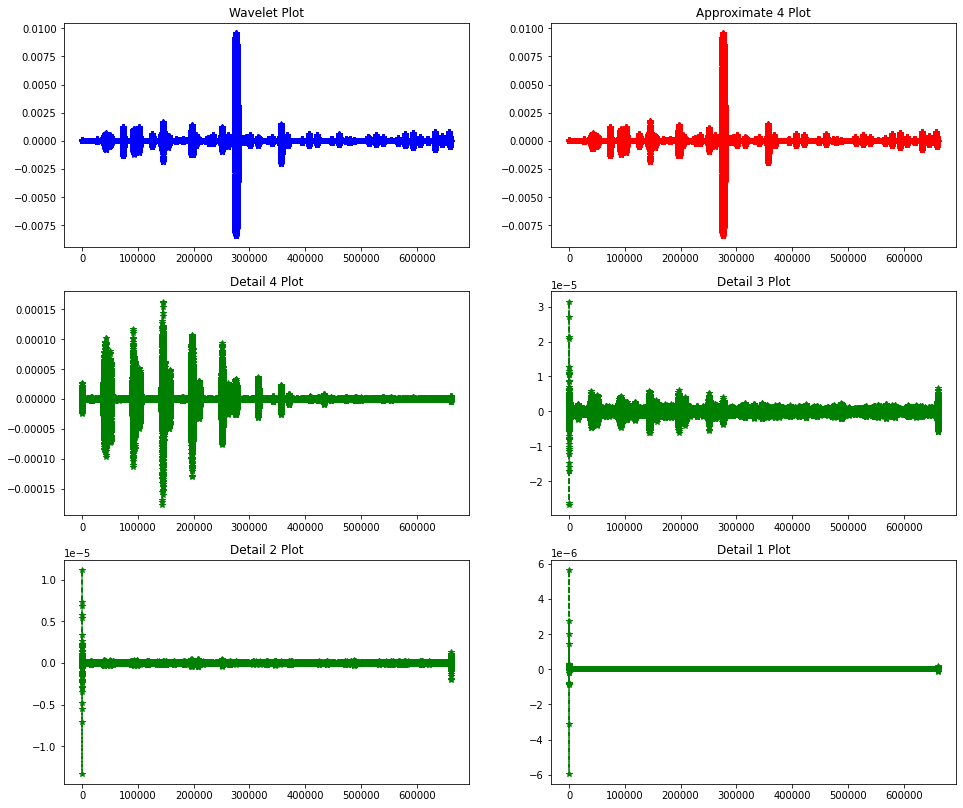

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(16,14))
  
axis[0, 0].plot(wavelets, '--*b')
axis[0, 0].set_title("Wavelet Plot")
  
axis[0, 1].plot(A4, '--*r')
axis[0, 1].set_title("Approximate 4 Plot")
  
axis[1, 0].plot(D4, '--*g')
axis[1, 0].set_title("Detail 4 Plot")

axis[1, 1].plot(D3, '--*g')
axis[1, 1].set_title("Detail 3 Plot")

axis[2, 0].plot(D2, '--*g')
axis[2, 0].set_title("Detail 2 Plot")

axis[2, 1].plot(D1, '--*g')
axis[2, 1].set_title("Detail 1 Plot")

plt.show()